In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 1
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, num_producers, num_consumers, num_influencers)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
producer_colors = []
consumer_colors = []
influencer_colors = []

for i in range(num_producers):
    #func = lambda x: exponential_decay(x, 1)
    # func = lambda x: 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    producer = Producer(i, content_market.sample_topic(), func)
    content_market.add_producer(producer)
    
    color = np.random.rand(3,)
    producer_colors.append(color)

for i in range(num_consumers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    consumer = Consumer(i, content_market.sample_topic(), func, 2, .1, 1)
    content_market.add_consumer(consumer)

    color = np.random.rand(3,)
    consumer_colors.append(color)
    print(len(consumer.get_following_rate_vector()))

for i in range(num_influencers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    influencer = Influencer(i, content_market.sample_topic(), 5, 1)
    content_market.add_influencer(influencer)

    color = np.random.rand(3,)
    influencer_colors.append(color)

7
7
7
7
7


In [6]:
import matplotlib.pyplot as plt

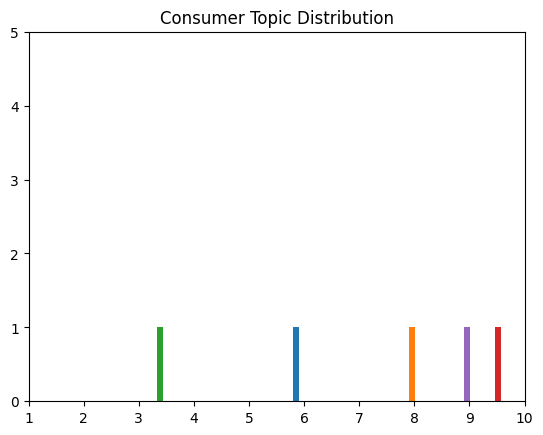

In [7]:
plt.figure()
plt.title("Consumer Topic Distribution")
plt.hist([c.main_interest for c in content_market.consumers])
plt.yticks(range(0, num_consumers + 1))
plt.xticks(range(1, 11))
plt.show()

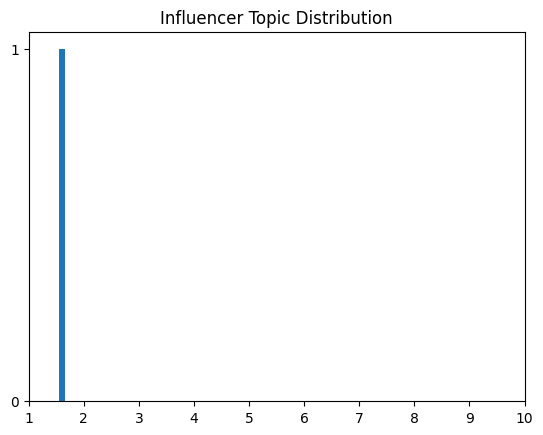

In [8]:
plt.figure()
plt.title("Influencer Topic Distribution")
plt.hist([i.main_interest for i in content_market.influencers])
plt.yticks(range(0, num_influencers + 1))
plt.xticks(range(1, 11))
plt.show()

In [9]:
consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)

Iteration 0 / 100 done.
Total Social Welfare: 3.289273322268883
Iteration 1 / 100 done.
Total Social Welfare: 4.176475696083687
Consumer rate change: 0.5135610280634054
Consumer utility change: 0.09895283496389434
Influencer rate change: 0.19207379659642568
Influencer utility change: 0.3018062006777342
Producer topic change: 0.002563817935405943
Producer utility change: 0.018126399663519532
Iteration 2 / 100 done.
Total Social Welfare: 4.177936494318381
Consumer rate change: 0.0
Consumer utility change: 0.0002902704701192027
Influencer rate change: 0.0
Influencer utility change: 9.445884098124857e-06
Producer topic change: 0.0
Producer utility change: 0.0
Converged.


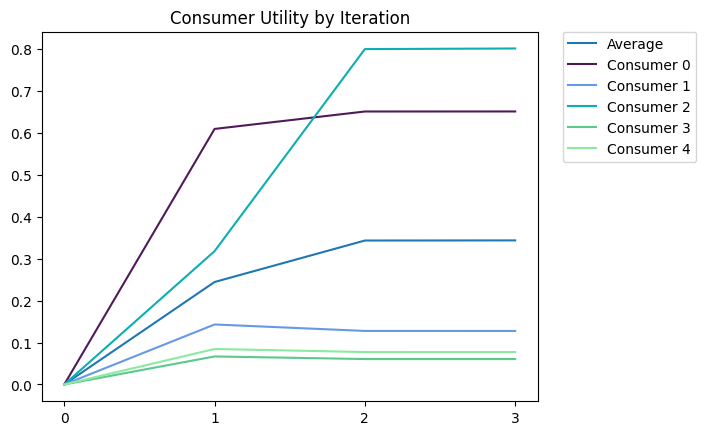

In [10]:
plt.figure()
plt.title("Consumer Utility by Iteration")
#plt.plot(total_stats['consumer_utilities'], label="Total")
plt.plot(average_stats['consumer_utilities'], label="Average")
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['utilities'], label="Consumer {}".format(consumer.index), color=consumer_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(range(len(average_stats['consumer_utilities'])))
plt.show()

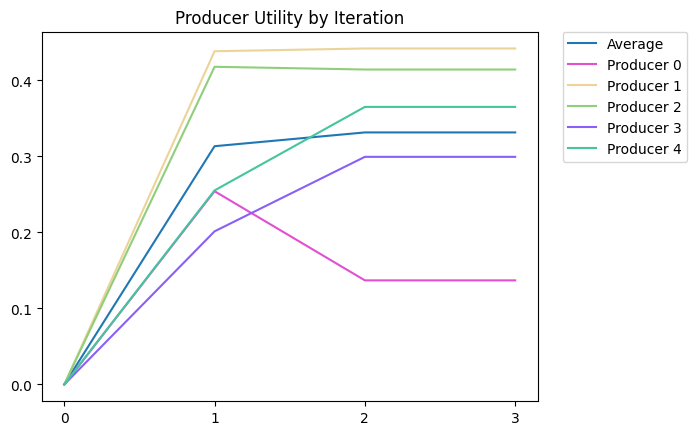

In [11]:
plt.figure()
plt.title("Producer Utility by Iteration")
#plt.plot(total_stats['producer_utilities'], label="Total")
plt.plot(average_stats['producer_utilities'], label="Average")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['utilities'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(range(len(average_stats['producer_utilities'])))
plt.show()

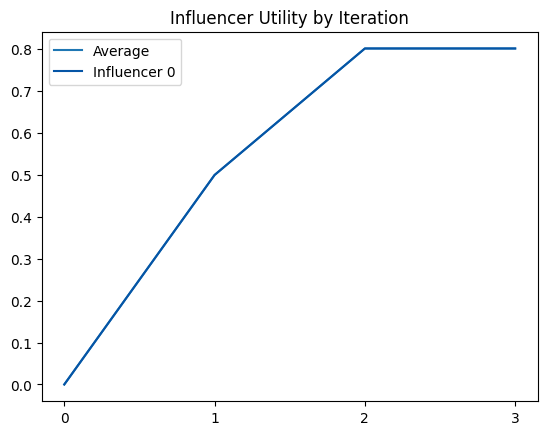

In [12]:
plt.figure()
plt.title("Influencer Utility by Iteration")
#plt.plot(total_stats['influencer_utilities'], label="Total")
plt.plot(average_stats['influencer_utilities'], label="Average")
for influencer in content_market.influencers:
    plt.plot(influencer_stats[influencer.index]['utilities'], label='Influencer {}'.format(influencer.index), color=influencer_colors[influencer.index])
plt.legend()
plt.xticks(range(len(average_stats['influencer_utilities'])))
plt.show()

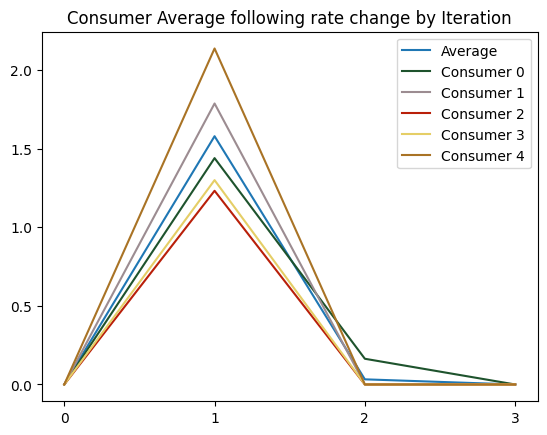

In [ ]:
plt.figure()
plt.title("Consumer Average following rate change by Iteration")
plt.plot(average_stats['consumer_rate_change'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['rate_change'], label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.xticks(range(len(average_stats['consumer_rate_change'])))
plt.show()

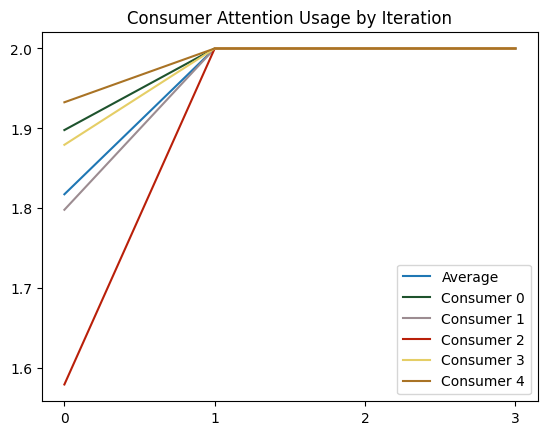

In [ ]:
plt.figure()
plt.title("Consumer Attention Usage by Iteration")
plt.plot(average_stats['consumer_attention_used'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['attention_used'], label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.xticks(range(len(average_stats['consumer_attention_used'])))
plt.show()

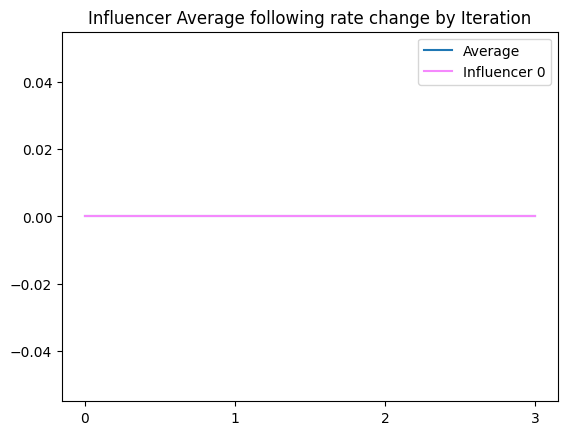

In [ ]:
plt.figure()
plt.title("Influencer Average following rate change by Iteration")
plt.plot(average_stats['influencer_rate_change'], label='Average')
for influencer in content_market.influencers:
    plt.plot(influencer_stats[influencer.index]['rate_change'], label='Influencer {}'.format(influencer.index), color=influencer_colors[influencer.index])
plt.legend()
plt.xticks(range(len(average_stats['influencer_rate_change'])))
plt.show()

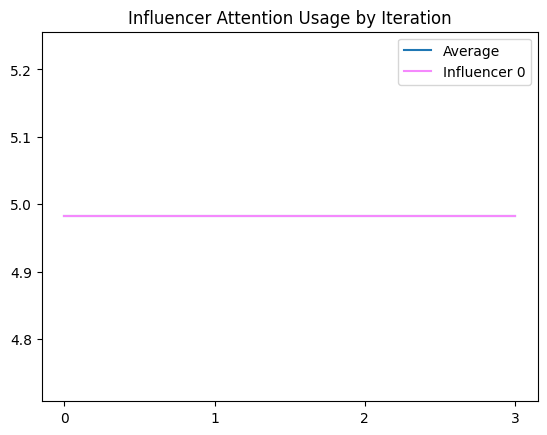

In [ ]:
plt.figure()
plt.title("Influencer Attention Usage by Iteration")
plt.plot(average_stats['influencer_attention_used'], label='Average')
for influencer in content_market.influencers:
    plt.plot(influencer_stats[influencer.index]['attention_used'], label='Influencer {}'.format(influencer.index), color=influencer_colors[influencer.index])
plt.legend()
plt.xticks(range(len(average_stats['influencer_attention_used'])))
plt.show()

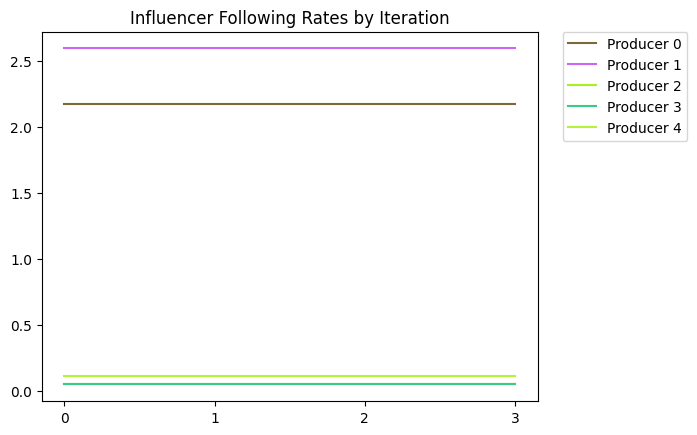

In [ ]:
plt.figure()
plt.title("Influencer Following Rates by Iteration")
following_rates_by_iteration = [[vec[i] for vec in influencer_stats[0]['following_rates']] for i in range(len(influencer_stats[0]['following_rates'][0]))]
for i in range(len(following_rates_by_iteration)):
    plt.plot(following_rates_by_iteration[i], label='Producer {}'.format(i), color=producer_colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(range(len(following_rates_by_iteration[0])))
plt.show()

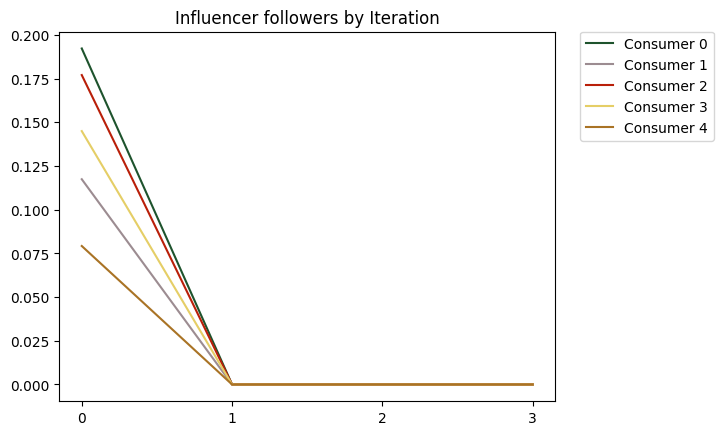

In [ ]:
plt.figure()
plt.title("Influencer followers by Iteration")
for consumer in content_market.consumers:
    following_rate_by_iteration = [vec[num_producers + content_market.influencers[0].index] for vec in consumer_stats[consumer.index]['following_rates']]
    plt.plot(following_rate_by_iteration, label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(range(len(following_rate_by_iteration)))
plt.show()

In [ ]:
consumer_stats

{0: {'following_rates': [array([0.3042845 , 0.20722497, 0.15809646, 0.62545603, 0.187509  ,
          0.19218161, 0.2231431 ]),
   array([6.16920395e-01, 0.00000000e+00, 0.00000000e+00, 2.61993415e-15,
          1.38307961e+00, 0.00000000e+00, 6.83536294e-16]),
   array([5.01257728e-01, 3.82130688e-17, 6.71595778e-18, 1.42671162e-18,
          1.49874227e+00, 0.00000000e+00, 0.00000000e+00]),
   array([5.01257728e-01, 3.82130688e-17, 6.71595778e-18, 1.42671162e-18,
          1.49874227e+00, 0.00000000e+00, 0.00000000e+00])],
  'utilities': [0,
   0.17510398972228697,
   0.22845168885580702,
   0.22839177290322477],
  'rate_change': [0, 1.4397877679478965, 0.16357171205015408, 0.0],
  'attention_used': [1.8978956649364265, 2.000000000000003, 2.0, 2.0]},
 1: {'following_rates': [array([0.84660444, 0.46689886, 0.33714332, 0.01071553, 0.00937847,
          0.11739833, 0.00995237]),
   array([1.19348975e-15, 2.00000000e+00, 4.10744208e-16, 4.31669464e-17,
          0.00000000e+00, 0.0000000

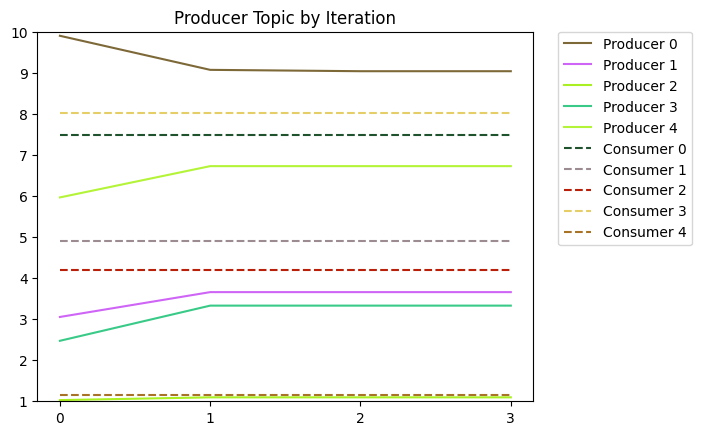

In [ ]:
plt.figure()
plt.title("Producer Topic by Iteration")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
for consumer in content_market.consumers:
    plt.plot([consumer.main_interest] * len(producer_stats[producer.index]['topics']), label='Consumer {}'.format(consumer.index), linestyle='--', color=consumer_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(topics[0][0], topics[0][1])
plt.xticks(range(len(producer_stats[0]['topics'])))
plt.show()

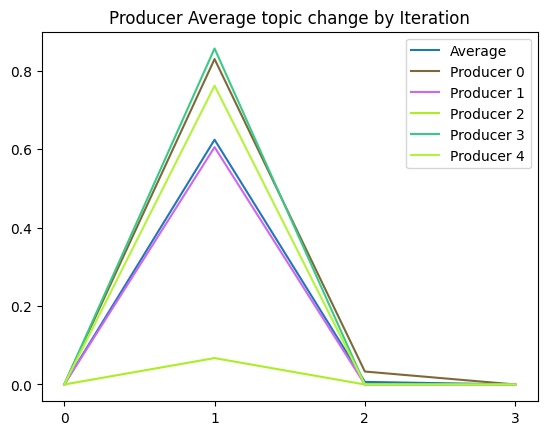

In [ ]:
plt.figure()
plt.title("Producer Average topic change by Iteration")
plt.plot(average_stats['producer_topic_change'], label='Average')
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topic_change'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend()
#plt.ylim(topics[0][0], topics[0][1])
plt.xticks(range(len(producer_stats[0]['topic_change'])))
plt.show()

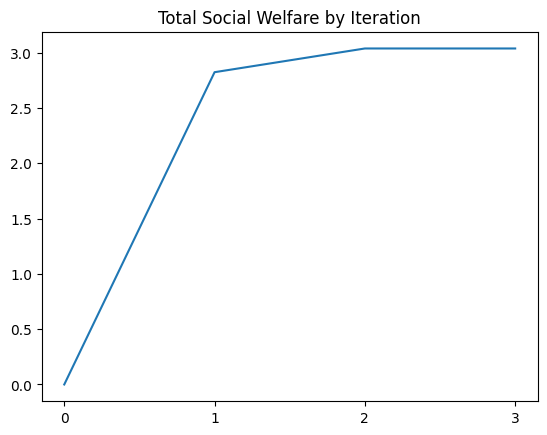

In [ ]:
plt.figure()
plt.title("Total Social Welfare by Iteration")
plt.plot(total_stats['social_welfare'], label="Total")
plt.xticks(range(len(total_stats['social_welfare'])))
plt.show()